# Capstone Battle of Neighborhoods
## Columbus downtown restaurant
### Tony Tang

#### Description
My company will relocate to downtown Columbus next year. Many people are interested in the restaurants around downtown - What are the top rated best restaurants? Where are they located? What the restaurant categories are avaiable? This analysis will try to answer these questions. In addition, I will suggest the best location if any people wants to open a new restaurant. 

#### Data
Columbus neighborhood data is available from WikiPedia: https://en.wikipedia.org/wiki/Neighborhoods_in_Columbus,_Ohio . 
Web scraping (e.g beautiful soap) can be done to extract the downtown neighborhoods. 

We will use OpenCage Geocoder (https://opencagedata.com/) to find the latitude and longitude of each neighborhood. OpenCage offers free API access (in place of Googel Geocoder) which is good enough for this exercise. 


#### Methodology
We will use FourSquare API to get restaurant list and their ratings, likes and tips. A map will be drawn to show the neighborhood of interest. Other visualization will be done to give more clarity into different numbers. And we will use K-Mean cluster algorithm to analyze the ratings, likes and tips and group these restaurants. The model may uncover something that human eyes can easily miss. 

In [1]:
# First of all, we need to install the folium library for drawing the map. 
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [2]:
# Columbus, OH downtown and surrounding districts.
# Web scraping (e.g beautiful soap) the above wikipedia page to get neiborhoods.
# Since we already did it in previous notebook we just hand pick the neighborhoods of interest in a list.
# Note: Strictly speaking Easton is little far from Columbus downtown. But it is a popular destination and with easy highway access. So we count it in,
columbus_neighborhoods = ['Downtown', 'Short North', 'German Village','Arena District','University District','Easton','Near East Side']

I will use opencagedata for geocoder to find the latitude and longitude of each neighborhood.

To get a free API key please go to https://opencagedata.com. 
Also see API doc: https://opencagedata.com/api.

OCD_API_KEY = 'xxxx'

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
import pandas as pd

col = ['Neighborhood', 'Latitude', 'Longitude']
# instantiate the dataframe
columbus_neighbor = pd.DataFrame(columns=col)
#columbus_neighbor

import requests
for neigh in columbus_neighborhoods :
    addr = neigh + ', Columbus, Ohio, United States'
    url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(addr, OCD_API_KEY)

    #Send the GET request. The result is a json object with many fields in it 
    results = requests.get(url).json()
    #Parse the json, get lat and lng
    lat_lng = results['results'][0]['geometry']
    #print('{} - {}'.format(neigh, lat_lng))
    
    #Append the {neighboorbood, Latitude, Longitude} triple to the dataframe
    columbus_neighbor = columbus_neighbor.append({col[0]: neigh,
                                          col[1]: lat_lng['lat'],
                                          col[2]: lat_lng['lng']}, ignore_index=True)
    

In [5]:
columbus_neighbor

,Neighborhood,Latitude,Longitude
0,Downtown,39.962703,-82.997899
1,Short North,39.977118,-83.004005
2,German Village,39.946397,-82.992847
3,Arena District,39.968570,-83.005477
4,University District,40.003735,-83.008799
5,Easton,40.047459,-82.915514
6,Near East Side,39.969763,-82.961516


In [6]:
# Now we get the center of Columbus Ohio in order to draw a map
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Columbus, Ohio'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Columbus, OHIO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Columbus, OHIO are 39.9622601, -83.0007065.


In [7]:
import folium # map rendering library

# create map of Columbus using latitude and longitude values
map_columbus = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(columbus_neighbor['Latitude'], columbus_neighbor['Longitude'], columbus_neighbor['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_columbus)  
    
map_columbus

Next we will use FourSquare API to get venue information. 
A verified free dev account can make 99,500 Regular API Calls per day and 500 Premium API Calls per day. 
Please see https://developer.foursquare.com/docs/api/troubleshooting/rate-limits for more information. 

In [8]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: xxx
CLIENT_SECRET:XXX


Now, let's get the top 100 venues that are in Downtow within a radius of 500 meters. 


In [9]:
# Get the downtown (first neighborhood) latitude and longitude values.
neighborhood_latitude = columbus_neighbor.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = columbus_neighbor.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = columbus_neighbor.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Downtown are 39.9627027, -82.9978988.


In [10]:
# We will exam the very downtown venues first
LIMIT = 100
latitude = neighborhood_latitude
longitude = neighborhood_longitude
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.\
format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

import requests
#Send the GET request and examine the resutls

In [11]:
results = requests.get(url).json()
print ( 'There are {} venus around {} within {} meters.'.format(len(results['response']['groups'][0]['items']), neighborhood_name, radius) )
results

There are 44 venus around Downtown within 500 meters.


{'meta': {'code': 200, 'requestId': '5de87c409388d7001bd286ec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Uptown District',
  'headerFullLocation': 'Uptown District, Columbus',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 39.967202704500004,
    'lng': -82.99203862909197},
   'sw': {'lat': 39.9582026955, 'lng': -83.00375897090804}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba0f7cff964a520e78a37e3',
       'name': 'Si Señor!',
       'location': {'address': '72 E Lynn St',
        'crossStreet': 'Pearl Alley',
        'lat': 39.963314348269805,
        'lng': -82.998768

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Si Señor!,Latin American Restaurant,39.963314,-82.998769
1,Tip Top Kitchen & Cocktails,American Restaurant,39.963772,-82.998777
2,The Athletic Club Of Columbus,Gym / Fitness Center,39.962941,-82.996939
3,Café Brioso,Coffee Shop,39.963640,-83.000568
4,Mitchell's Steakhouse,Steakhouse,39.963516,-82.998360


In [14]:
nearby_venues.shape

(44, 4)

In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


Next let's exam all downtown neighborhoods.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'ID', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
#Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues
columbus_venues = getNearbyVenues(names=columbus_neighbor['Neighborhood'],
                                   latitudes=columbus_neighbor['Latitude'],
                                   longitudes=columbus_neighbor['Longitude']
                                  )

Downtown
Short North
German Village
Arena District
University District
Easton
Near East Side


In [18]:
print(columbus_venues.shape)
columbus_venues.head()

(364, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,39.962703,-82.997899,4ba0f7cff964a520e78a37e3,Si Señor!,39.963314,-82.998769,Latin American Restaurant
1,Downtown,39.962703,-82.997899,4b058649f964a520c35a22e3,Tip Top Kitchen & Cocktails,39.963772,-82.998777,American Restaurant
2,Downtown,39.962703,-82.997899,4c42363fcc410f471078ac61,The Athletic Club Of Columbus,39.962941,-82.996939,Gym / Fitness Center
3,Downtown,39.962703,-82.997899,4b0aafe2f964a520642623e3,Café Brioso,39.963640,-83.000568,Coffee Shop
4,Downtown,39.962703,-82.997899,4b3b83d3f964a520f97425e3,Mitchell's Steakhouse,39.963516,-82.998360,Steakhouse


In [19]:
columbus_venues['Neighborhood'].value_counts()

Short North            89
Arena District         80
Easton                 69
Downtown               44
German Village         44
University District    32
Near East Side          6
Name: Neighborhood, dtype: int64

In [20]:
print('There are {} uniques categories.'.format(len(columbus_venues['Venue Category'].unique())))

There are 133 uniques categories.


Next we will find all the restaurants in columbus_venues

In [21]:
# filter venues, Only keep restaurants. 
# There is no single venue category for restaurant with FourSqueare API. A restaurant can be categoried as Steakhouse, Deli, Breakfast places etc.
# I will look for key words like Restaurant, Steakhouse, Snack, Chicken, Pizza, Breakfast etc
rest_venues = columbus_venues[columbus_venues['Venue Category'].str.contains('Restaurant') 
                              | columbus_venues['Venue Category'].str.contains('Steakhouse')
                              | columbus_venues['Venue Category'].str.contains('Snack')
                              | columbus_venues['Venue Category'].str.contains('Café')
                              | columbus_venues['Venue Category'].str.contains('Bar')
                              | columbus_venues['Venue Category'].str.contains('Pub')
                              | columbus_venues['Venue Category'].str.contains('Coffee')
                              | columbus_venues['Venue Category'].str.contains('Food')
                              | columbus_venues['Venue Category'].str.contains('Deli')
                              | columbus_venues['Venue Category'].str.contains('Breakfast')
                              | columbus_venues['Venue Category'].str.contains('Diner')
                              | columbus_venues['Venue Category'].str.contains('Taco')
                              | columbus_venues['Venue Category'].str.contains('Pizza')
                              | columbus_venues['Venue Category'].str.contains('Bakery')
                              | columbus_venues['Venue Category'].str.contains('Sandwich')
                              | columbus_venues['Venue Category'].str.contains('Salad')
                              | columbus_venues['Venue Category'].str.contains('Brewery')
                              | columbus_venues['Venue Category'].str.contains('Bistro')
                              | columbus_venues['Venue Category'].str.contains('Burger')
                              | columbus_venues['Venue Category'].str.contains('BBQ')
                              | columbus_venues['Venue Category'].str.contains('Chicken')
                              | columbus_venues['Venue Category'].str.contains('Donut')
                              | columbus_venues['Venue Category'].str.contains('Chicken')
                              | columbus_venues['Venue Category'].str.contains('Noodle')
                              | columbus_venues['Venue Category'].str.contains('Chicken')
                              | columbus_venues['Venue Category'].str.contains('Ice Cream')
                             ].reset_index(drop=True)
rest_venues.shape

(203, 8)

In [22]:
rest_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,39.962703,-82.997899,4ba0f7cff964a520e78a37e3,Si Señor!,39.963314,-82.998769,Latin American Restaurant
1,Downtown,39.962703,-82.997899,4b058649f964a520c35a22e3,Tip Top Kitchen & Cocktails,39.963772,-82.998777,American Restaurant
2,Downtown,39.962703,-82.997899,4b0aafe2f964a520642623e3,Café Brioso,39.963640,-83.000568,Coffee Shop
3,Downtown,39.962703,-82.997899,4b3b83d3f964a520f97425e3,Mitchell's Steakhouse,39.963516,-82.998360,Steakhouse
4,Downtown,39.962703,-82.997899,4b107f18f964a520bb7123e3,Due Amici Restaurant,39.963759,-82.998821,Italian Restaurant
5,Downtown,39.962703,-82.997899,4b0d3a58f964a520d64423e3,Starbucks,39.962784,-82.998190,Coffee Shop
6,Downtown,39.962703,-82.997899,589ba47051d19e538db89ad3,Buckeye Bourbon House,39.963721,-82.999950,Whisky Bar
7,Downtown,39.962703,-82.997899,57d0991c498e4f97b790885a,Pins Mechanical Company,39.965908,-82.997177,Bar
8,Downtown,39.962703,-82.997899,565096cd498ebeda6a6c6427,Superchef's,39.962941,-82.995396,Breakfast Spot
9,Downtown,39.962703,-82.997899,599cd72c31fd141e5df6c214,Pub Mahone,39.963616,-82.999914,Irish Pub


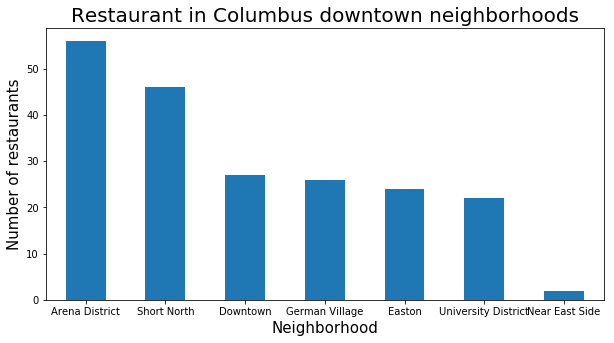

In [25]:
import matplotlib.pyplot as plt
rest_venues['Neighborhood'].value_counts().plot.bar(figsize=(10,5))
plt.title('Restaurant in Columbus downtown neighborhoods', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [26]:
rest_venues['Neighborhood'].value_counts()

Arena District         56
Short North            46
Downtown               27
German Village         26
Easton                 24
University District    22
Near East Side          2
Name: Neighborhood, dtype: int64

Next 6 cells call FourSquare <b>premium</b> API to get rating etc for each restaurant. Please remember for free account one can get upto 500 calls per day. If you restaurant list is too long you won't get all in one day. You can make calls in batches. And save 1 batch to csv file each day until you finish all batches. Then merge the csv files. 

If you already have the restaurant rating csv file you can skip next 6 cell, just read the csv file directly.

In [27]:
def get_venue_details(venue_id):
    venue_details={}

    #url to fetch data from foursquare api. This is a premium call, limited to 500 calls per day
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    #print(results)
    if (results['meta']['code'] == 429) : 
        print ("Quota exceeded")
    else: 
        venue_data=results['response']['venue']
        try:
            #venue_id=venue_data['id']
            #venue_name=venue_data['name']
            venue_likes=venue_data['likes']['count']
            venue_rating=venue_data['rating']
            venue_tips=venue_data['tips']['count']
            #venue_details = [venue_id,venue_likes,venue_rating,venue_tips]
            venue_details = {'ID':venue_id, 'Likes':venue_likes, 'Rating':venue_rating, 'Tips':venue_tips}

        except KeyError:
            pass

    return venue_details

In [28]:
# test premium call. just make sure no error message like 'Quota exceeded'
get_venue_details('4c113213ce57c928f21983d2')

{'ID': '4c113213ce57c928f21983d2', 'Likes': 15, 'Rating': 7.6, 'Tips': 4}

In [29]:
col_names=['ID','Likes','Rating','Tips']
rating_df = pd.DataFrame(columns=col_names)

In [30]:
for i in rest_venues['ID'] :
    
    #Append the {neighboorbood, Latitude, Longitude} triple to the dataframe
    r = get_venue_details(i)
    if (r != {}) :
        rating_df = rating_df.append(get_venue_details(i), ignore_index=True)

In [31]:
rating_df.shape

(193, 4)

In [32]:
rating_df.head()

,ID,Likes,Rating,Tips
0,4ba0f7cff964a520e78a37e3,33,8.7,14
1,4b058649f964a520c35a22e3,221,8.7,122
2,4b0aafe2f964a520642623e3,111,8.7,46
3,4b3b83d3f964a520f97425e3,42,8.2,14
4,4b107f18f964a520bb7123e3,64,8.0,40


In [ ]:
# The code was removed by Watson Studio for sharing.

In [33]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
ID        193 non-null object
Likes     193 non-null object
Rating    193 non-null float64
Tips      193 non-null object
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [34]:
# if Likes, Rating, Tips fields are not numeric cast them to numberic
rating_df.Likes = rating_df.Likes.astype(int)
rating_df.Tips = rating_df.Tips.astype(int)
rating_df.Rating = rating_df.Rating.astype(float)

In [35]:
rating_df.describe()

,Likes,Rating,Tips
count,193.000000,193.000000,193.000000
mean,54.683938,7.747668,22.067358
std,65.080628,0.791891,26.694074
min,0.000000,5.700000,0.000000
25%,10.000000,7.300000,4.000000
50%,30.000000,7.800000,14.000000
75%,82.000000,8.200000,31.000000
max,461.000000,9.400000,156.000000


Next 2 cells show you how to save rating_df dataframe to COS. This is one time only. You can skip it if you've already done it or don't want do it.

We will save the rating_df dataframe to COS attached to this Watson Studio project. 
Please see refer to Watson Studio documentation at https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/project-lib-python.html?audience=wdp

In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:
from project_lib import Project

project = Project(project_id=my_project_id, project_access_token=my_project_token)
project.save_data(file_name = "columbus_restaurant_rating.csv",data = rating_df.to_csv(index=False), overwrite=True)

### Next we will build a cluster model to group restaurants

We observe the Rating, Like and Tip have different scales (see output of rating_df.describe() above.). 
This may create bias. To overcome it we apply StandardScaler to these 3 features. 

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = rating_df.values[:,1:] # exclude the ID colum
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
#Clus_dataSet

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now we use K-Mean cluster to group the restaurants in 3 groups

In [37]:
from sklearn.cluster import KMeans 
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 1 2 2 2 2 1 2 2
 0 1 1 0 1 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 1 2 2
 2 0 0 2 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 2 0 2 0 0 0 2 0 2 2 0 0 0 0 2 0 0
 0 0 0 0 0 0 2 0 0 0 0 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 2 1 2 2 0 0 2 0 0
 2 0 0 2 2 0 0 0]


In [38]:
# Add Group column to the rating_df dataframe
rating_df['Group'] = labels

In [39]:
rating_df.head()

,ID,Likes,Rating,Tips,Group
0,4ba0f7cff964a520e78a37e3,33,8.7,14,0
1,4b058649f964a520c35a22e3,221,8.7,122,1
2,4b0aafe2f964a520642623e3,111,8.7,46,2
3,4b3b83d3f964a520f97425e3,42,8.2,14,0
4,4b107f18f964a520bb7123e3,64,8.0,40,2


We will use describe function to take a look of the distribution of each group

In [40]:
rating_df[rating_df['Group']==0].describe()

,Likes,Rating,Tips,Group
count,130.000000,130.000000,130.000000,130.0
mean,19.823077,7.477692,8.700000,0.0
std,15.638090,0.724891,8.326338,0.0
min,0.000000,5.700000,0.000000,0.0
25%,8.000000,7.100000,2.000000,0.0
50%,13.500000,7.600000,6.000000,0.0
75%,30.750000,7.900000,14.000000,0.0
max,60.000000,9.200000,41.000000,0.0


In [41]:
rating_df[rating_df['Group']==1].describe()

,Likes,Rating,Tips,Group
count,12.000000,12.000000,12.000000,12.0
mean,237.666667,8.600000,91.333333,1.0
std,81.377162,0.378994,29.152681,0.0
min,166.000000,8.100000,50.000000,1.0
25%,181.500000,8.250000,79.750000,1.0
50%,217.000000,8.650000,85.500000,1.0
75%,252.000000,8.900000,104.500000,1.0
max,461.000000,9.100000,156.000000,1.0


In [42]:
rating_df[rating_df['Group']==2].describe()

,Likes,Rating,Tips,Group
count,51.000000,51.000000,51.000000,51.0
mean,100.490196,8.235294,39.843137,2.0
std,28.994739,0.643684,20.786893,0.0
min,55.000000,6.700000,10.000000,2.0
25%,78.500000,7.850000,25.000000,2.0
50%,97.000000,8.200000,38.000000,2.0
75%,120.500000,8.650000,47.000000,2.0
max,166.000000,9.400000,136.000000,2.0


Similary we can use box plot to see distribution of each group

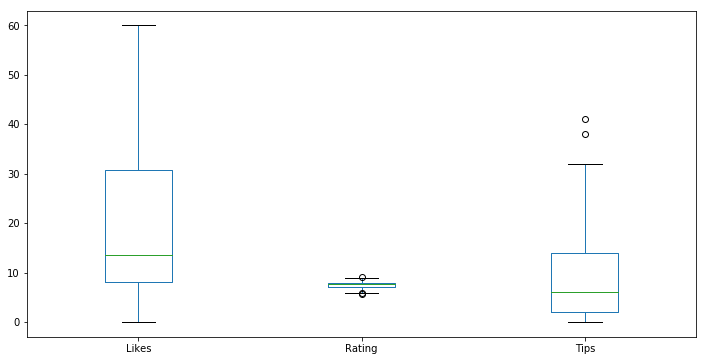

In [43]:
rating_df[rating_df['Group']==0][['Likes', 'Rating', 'Tips']].plot(kind='box', figsize=(12, 6))

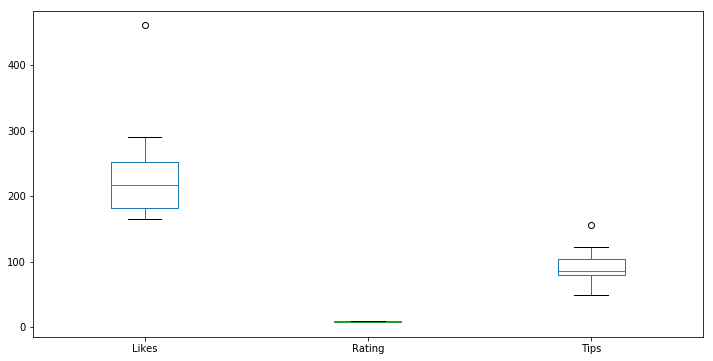

In [44]:
rating_df[rating_df['Group']==1][['Likes', 'Rating', 'Tips']].plot(kind='box', figsize=(12, 6))

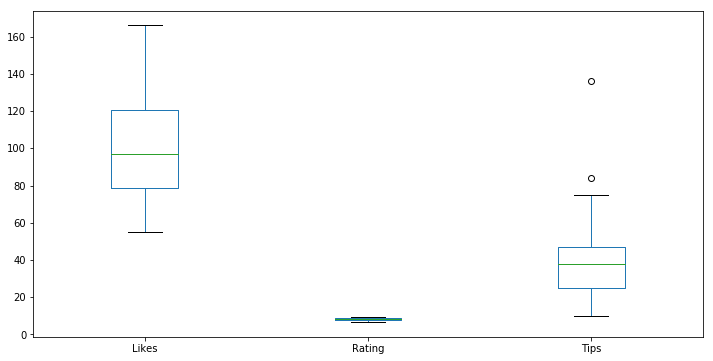

In [45]:
rating_df[rating_df['Group']==2][['Likes', 'Rating', 'Tips']].plot(kind='box', figsize=(12, 6))

#### Result

<b>From above we can see the the group 1 scores highest in Rating and Likes and Tips. This group represents the most popular and highest rated restaurants. Let's call it Elite Group </b>

Next we will merge the rating dataframe with the restaurant venue dataframe

In [46]:
# Merge rest_venues with rating_df
rest_rating = rest_venues.merge(rating_df, left_on='ID', right_on='ID', how='left').drop_duplicates().reset_index(drop=True)
rest_rating.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes,Rating,Tips,Group
0,Downtown,39.962703,-82.997899,4ba0f7cff964a520e78a37e3,Si Señor!,39.963314,-82.998769,Latin American Restaurant,33.0,8.7,14.0,0.0
1,Downtown,39.962703,-82.997899,4b058649f964a520c35a22e3,Tip Top Kitchen & Cocktails,39.963772,-82.998777,American Restaurant,221.0,8.7,122.0,1.0
2,Downtown,39.962703,-82.997899,4b0aafe2f964a520642623e3,Café Brioso,39.963640,-83.000568,Coffee Shop,111.0,8.7,46.0,2.0
3,Downtown,39.962703,-82.997899,4b3b83d3f964a520f97425e3,Mitchell's Steakhouse,39.963516,-82.998360,Steakhouse,42.0,8.2,14.0,0.0
4,Downtown,39.962703,-82.997899,4b107f18f964a520bb7123e3,Due Amici Restaurant,39.963759,-82.998821,Italian Restaurant,64.0,8.0,40.0,2.0


In [47]:
best_restaurants = rest_rating[rest_rating['Group']==1].reset_index(drop=True)
best_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes,Rating,Tips,Group
0,Downtown,39.962703,-82.997899,4b058649f964a520c35a22e3,Tip Top Kitchen & Cocktails,39.963772,-82.998777,American Restaurant,221.0,8.7,122.0,1.0
1,Short North,39.977118,-83.004005,4a9ee1c3f964a5209d3b20e3,Jeni's Splendid Ice Creams,39.976938,-83.003317,Ice Cream Shop,291.0,9.1,115.0,1.0
2,Short North,39.977118,-83.004005,51a8baad498e1ffa7e3c497d,Bakersfield Short North,39.977325,-83.003826,Taco Place,213.0,8.5,50.0,1.0
3,Short North,39.977118,-83.004005,4b095bc9f964a520221623e3,Marcella's,39.974913,-83.003256,Italian Restaurant,182.0,8.9,70.0,1.0
4,Short North,39.977118,-83.004005,4b15bd76f964a5208eb323e3,Union Cafe,39.978435,-83.003466,Gay Bar,240.0,8.3,101.0,1.0
5,Short North,39.977118,-83.004005,5282b6bd498eb4e4f8c40e95,Melt Bar & Grilled,39.979464,-83.003850,Sandwich Place,288.0,8.6,83.0,1.0
6,German Village,39.946397,-82.992847,4b28fadff964a520e79624e3,Schmidt's Restaurant und Sausage Haus,39.946222,-82.990993,German Restaurant,461.0,9.1,156.0,1.0
7,German Village,39.946397,-82.992847,4b27dbd6f964a5204a8b24e3,Lindey's,39.950775,-82.993778,American Restaurant,208.0,8.9,57.0,1.0
8,University District,40.003735,-83.008799,4b166611f964a520aeb823e3,Buckeye Donuts,40.003084,-83.008623,Donut Shop,180.0,8.8,83.0,1.0
9,Easton,40.047459,-82.915514,4b09c0eff964a520fe1c23e3,The Cheesecake Factory,40.048950,-82.915585,American Restaurant,229.0,8.1,88.0,1.0


In [48]:
best_restaurants['Venue Category'].value_counts()

American Restaurant    3
German Restaurant      1
Donut Shop             1
Ice Cream Shop         1
Gay Bar                1
Italian Restaurant     1
Taco Place             1
Burger Joint           1
Sandwich Place         1
Irish Pub              1
Name: Venue Category, dtype: int64

#### Discussion and Conclusion

<b> The above table is the list of most popular and highest rated restaurant around downtown Columbus. You can see Short North and Easton have most best restaurants in town. And American restaurant is the most popular category. </b>

To open a new restaurant there are many considerations. Foot traffice is one. Rental cost is another. 

Short North and Easton are the most popular places for restaurants. People like to come to a places that has many choices. So these two are good canididate for your new restaurants. 

I am surprised that Downtown area only has one restaurant made the Elite group. Downtown has may office buildings and many travelers. It will be a good option to open a nice restaurant there because of less competition. Of course you have to consider other factor like the rental cost. 

The arena district has most restaurant but none of them made into the Elit group. If you open a nice restaurant in that area it may stand out. 

The University district has one restaurant made the Elit group. This district has a lot student population. This might be your choice if you like to open a nice restaurant that fit the spending habit of the students. 

This analysis provide you some insight. You will need to make your own decision based on all factors.   